<a href="https://colab.research.google.com/github/luigiselmi/dl_tensorflow/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow
Tensorflow is a deep learning framewok that supports all the mathematical operations on tensors, provides the basic components to build a neural network such as different kind of layers and activation functions, and optimizers, and supports the automatic differentiation to perform the backpropagation algorithm. Keras is a high level API on top of Tensorflow.

## Tensors and variables
Tensors are multidimensional arrays. In Tensorflow a scalar is a tensor of rank 0, a vector a tensor of rank 1, a matrix a tensor of rank 2, and so forth. A tensor values cannot be modified after it has been created so it is said to be immutable. A variable can be modified, therefore it is mutable.

In [1]:
import tensorflow as tf

In [2]:
x = tf.constant(1.)
print(x)

tf.Tensor(1.0, shape=(), dtype=float32)


In [3]:
x = tf.ones(shape=(3, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]
 [1.]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.zeros(shape=(3, 1))
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

In [5]:
x = tf.random.uniform(shape=(10, 1), minval=0., maxval=1.0)
x

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.8867316 ],
       [0.8246943 ],
       [0.3471583 ],
       [0.5521076 ],
       [0.26243293],
       [0.9457302 ],
       [0.02070427],
       [0.31914318],
       [0.82232916],
       [0.7681892 ]], dtype=float32)>

In [6]:
x = tf.random.normal(shape=(10, 1), mean=0.0, stddev=1.0)
x

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-0.6116346 ],
       [ 0.5573564 ],
       [-0.43280107],
       [-1.000692  ],
       [-1.1450459 ],
       [-0.5100546 ],
       [-1.5258567 ],
       [-0.3217215 ],
       [-0.5679739 ],
       [-0.9799295 ]], dtype=float32)>

If we try to change the value of a tensor we get an error

In [7]:
x[0] = 1

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

We can use a variable if we need to change its value after the instatiation

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.97851384],
       [ 1.7053525 ],
       [-0.5467912 ]], dtype=float32)>


We change the value of the first element of the vector

In [10]:
v[0].assign(1.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 1.       ],
       [ 1.7053525],
       [-0.5467912]], dtype=float32)>

In [11]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.       ],
       [ 1.7053525],
       [-0.5467912]], dtype=float32)>


## Tensor operations
Here few examples of operation on tensors.

In [12]:
tf.square(4)

<tf.Tensor: shape=(), dtype=int32, numpy=16>

### Vector product
In Tensorflow arrays have a columnar shape by default. They can be reshaped as row vector by applying the transpose operator.   

In [17]:
a = tf.constant([1, 2, -1], shape=(3,1)) # 1st column vector
b = tf.constant([1, -1, -1], shape=(3,1)) #2nd column vector
b = tf.transpose(b) # row vector
print('Left vector shape: {}\nRight vector shape: {}'.format(a.shape, b.shape))

Left vector shape: (3, 1)
Right vector shape: (1, 3)


In [18]:
tf.matmul(b,a)

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[0]], dtype=int32)>

### Gradient
We can compute the derivative of a function F(x) of an input variable x. For example

$$f(x) = x^2$$

so that

$$\frac{df}{dx} = 2x$$

and

$$\left (\frac{df}{dx} \right)_{x=3}  = 6$$


In [19]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
  gradient = tape.gradient(result, input_var)

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

## 2nd order derivative
We can use the GradientTape to compute the 2nd order derivative of a function, for example the height with time of a body of unit mass falling from a height H is

$$y = H - \frac {1}{2}gt^2$$

the 1st derivative, its speed v, is

$$v = \frac{dy}{dt} = gt$$

and its accelleration a is

$$a = \frac{d^2y}{dt^2} = g$$

In [20]:
g = 9.4 # m/s^2
H = 100 # m
t = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    y = (1/2) * g * t ** 2
    v = inner_tape.gradient(y, t)
  a = outer_tape.gradient(v, t)
print(a == g)

tf.Tensor(True, shape=(), dtype=bool)


## A linear classifier
We create two sets of synthetic data points, positives and negatives, in a 2D plane and we will compute a linear classifier that will tell the class a new data point belongs to depending on its coordinates.

In [21]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
mean=[0, 3],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
mean=[3, 0],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)

In [22]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [23]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

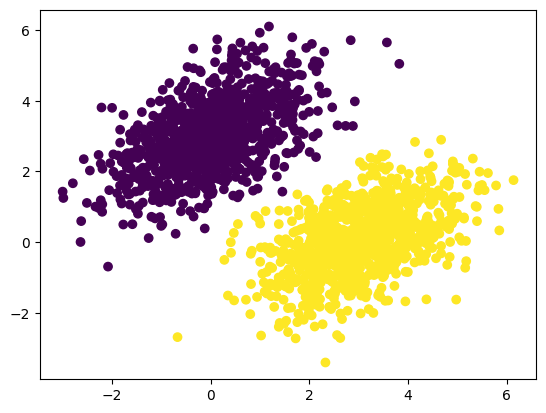

In [24]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [25]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [26]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [27]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [28]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [29]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.2010
Loss at step 1: 0.1154
Loss at step 2: 0.0910
Loss at step 3: 0.0831
Loss at step 4: 0.0778
Loss at step 5: 0.0733
Loss at step 6: 0.0692
Loss at step 7: 0.0654
Loss at step 8: 0.0620
Loss at step 9: 0.0589
Loss at step 10: 0.0560
Loss at step 11: 0.0534
Loss at step 12: 0.0510
Loss at step 13: 0.0488
Loss at step 14: 0.0468
Loss at step 15: 0.0449
Loss at step 16: 0.0432
Loss at step 17: 0.0417
Loss at step 18: 0.0403
Loss at step 19: 0.0390
Loss at step 20: 0.0378
Loss at step 21: 0.0368
Loss at step 22: 0.0358
Loss at step 23: 0.0349
Loss at step 24: 0.0341
Loss at step 25: 0.0333
Loss at step 26: 0.0326
Loss at step 27: 0.0320
Loss at step 28: 0.0314
Loss at step 29: 0.0309
Loss at step 30: 0.0304
Loss at step 31: 0.0300
Loss at step 32: 0.0296
Loss at step 33: 0.0292
Loss at step 34: 0.0289
Loss at step 35: 0.0286
Loss at step 36: 0.0283
Loss at step 37: 0.0280
Loss at step 38: 0.0278
Loss at step 39: 0.0276


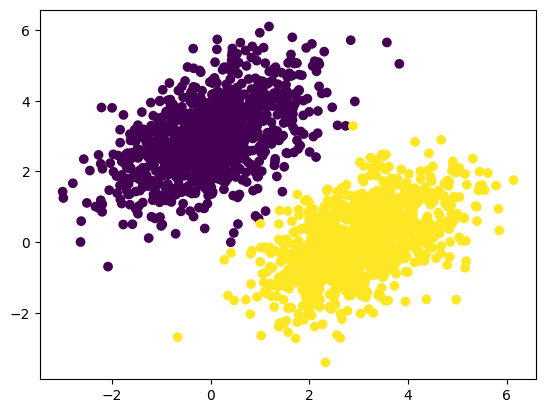

In [30]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

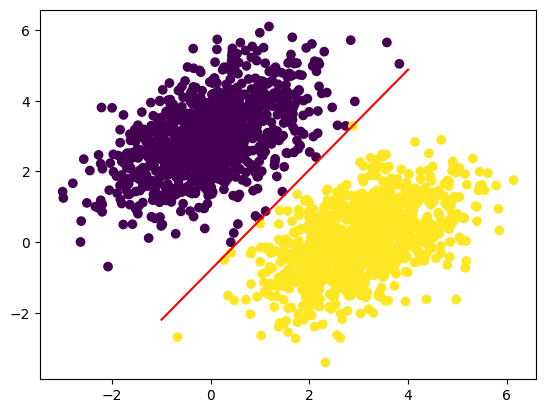

In [31]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)